In [1]:
"""
https://colab.research.google.com/github/googlesamples/mediapipe/blob/main/examples/face_landmarker/python/%5BMediaPipe_Python_Tasks%5D_Face_Landmarker.ipynb?hl=es-419#scrollTo=s3E6NFV-00Qt
"""
print("Información Referencia")

Información Referencia


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
#from google.colab.patches import cv2_imshow

In [3]:
def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

In [4]:
def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [5]:
imagen01 = "img/Peoples.jpg" # "business-person.png"

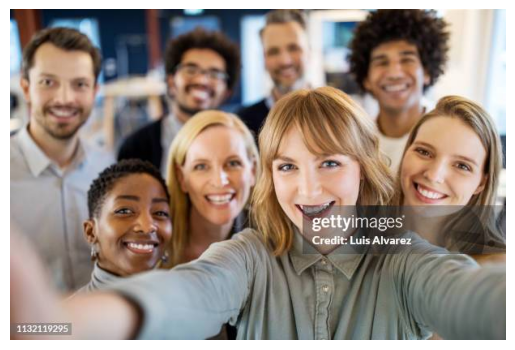

In [6]:
img = cv2.imread(imagen01)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)  # Sin conversión BGR a RGB
plt.axis("off")  # Ocultar los ejes
plt.show()

In [7]:
#img = cv2.imread("business-person.png")

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#plt.imshow(img)  # Sin conversión BGR a RGB
#plt.axis("off")  # Ocultar los ejes
#plt.show()

In [8]:
# STEP 2: Create an FaceLandmarker object.
model_asset_path='face_landmarker_v2_with_blendshapes.task'

base_options = python.BaseOptions(model_asset_path)
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

In [9]:
# STEP 3: Load the input image.
image = mp.Image.create_from_file(imagen01)

In [10]:
# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

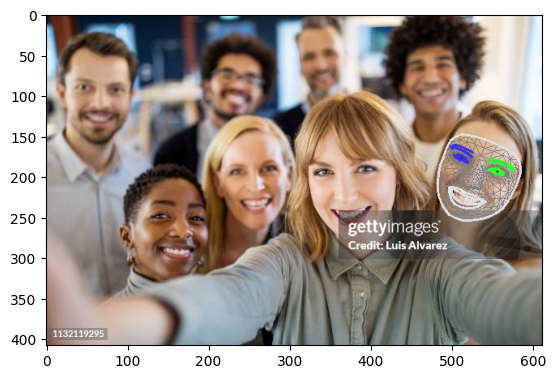

In [11]:
# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
#cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
#img = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
#img = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_image)
plt.show()

#plt.imshow(img)  # Sin conversión BGR a RGB
#plt.axis("off")  # Ocultar los ejes
#plt.show()

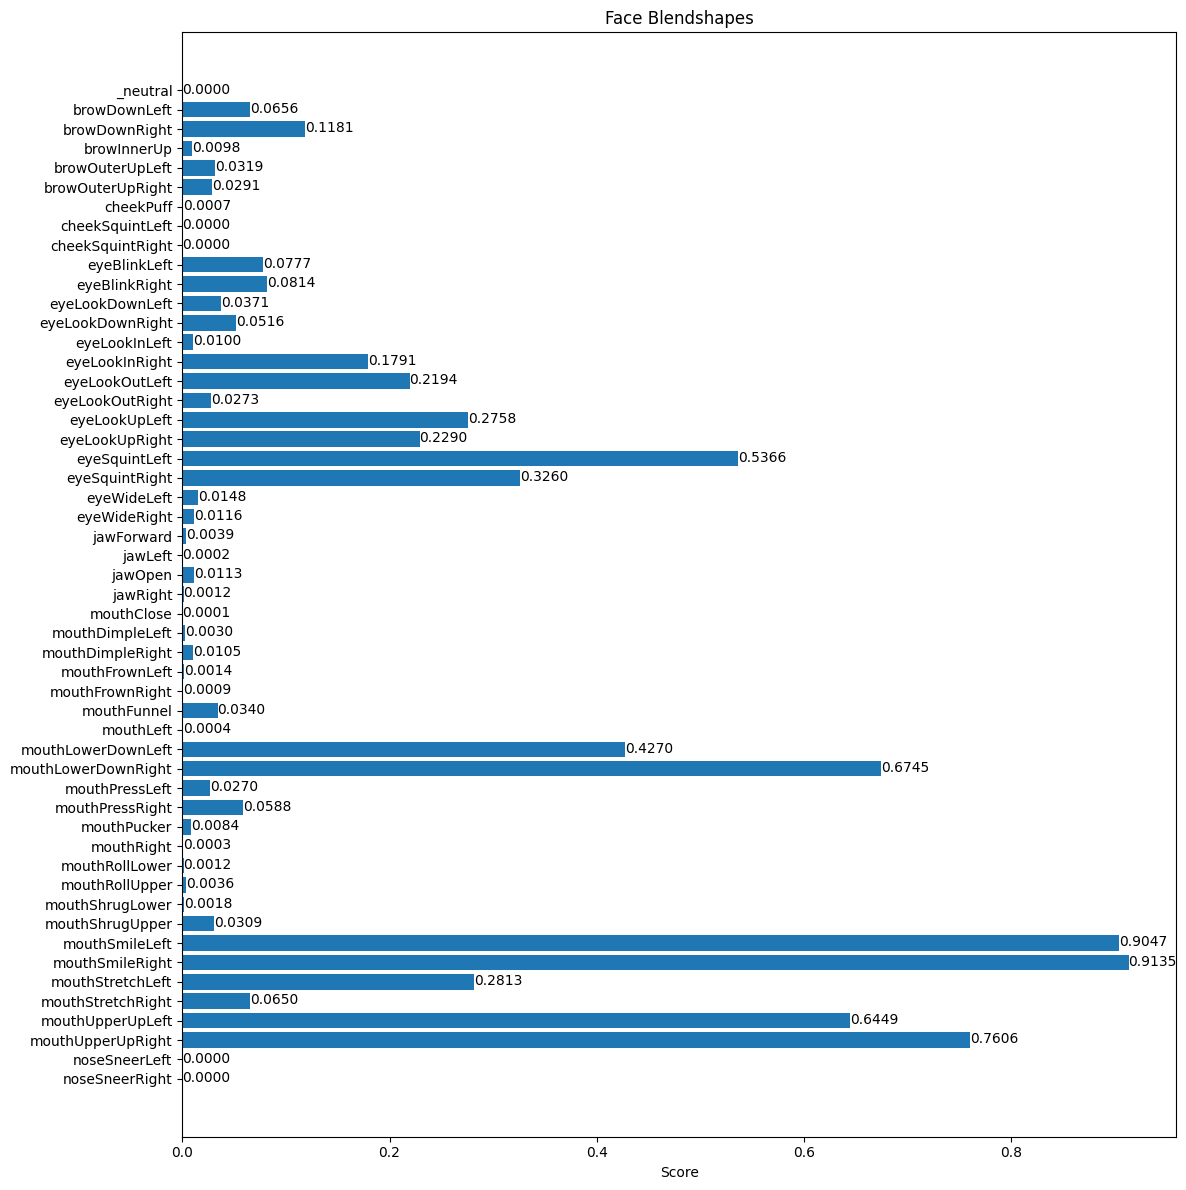

In [12]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

In [13]:
print(detection_result.facial_transformation_matrixes)

[array([[  0.90372169,   0.24514392,  -0.35098776,  33.94984436],
       [ -0.3287653 ,   0.92251676,  -0.20218055,   1.14561033],
       [  0.27422857,   0.2981075 ,   0.91429269, -52.49633026],
       [  0.        ,   0.        ,   0.        ,   1.        ]])]
